<h1><center>Table of contents.</h1>

1. [Introduction](#Intro)
2. [Background](#Back)
3. [Related Work](#ExistingModels)
4. [Importing Libraries](#Libraries)
5. [Data](#Data)
6. [Methods](#Methods)
7. [Data Preprocessing](#Clean)
8. [Model](#Model)
9. [Model Evaluation](#Tuning)
10. [Model Deployment](#Testing)
11. [Conclusions](End)

<a name="Intro"></a>
<h1><center> 1. Introduction.

Writing things down by hand is an important way of keeping information for the future, but it can easily get ruined or lost. Saving handwritten documents digitally is important so that they can be easily searched and kept safe. However, because everyone's handwriting is different, it's tricky to do this. Penpal helps to solve this problem.

Handwritten text recognition (HTR) is a way to use a computer to read and understand words that are written by hand. To do this, the computer needs to be able to separate the words and read them in the right order. Scientists are always working on new and better ways to do this, like using different combinations of neural networks.

Recently, a new type of neural network called a "vision transformer" has been used to analyze images. They have been really good at recognizing images and have worked just as well as the best neural networks. In this project, the scientists will explore using vision transformers to recognize handwritten text.


<h2> 1.1. Aim.

1. Develop a machine learning model that can recognize different styles of handwriting, so that it can accurately convert handwritten notes into digital format.
2. Create a database to store the digitized notes in a secure and organized manner.
3. Implement encryption and other security measures to protect the privacy of the notes.

<h2> 1.2. Challenges and Limitations.

There are a few big challenges when it comes to teaching a computer to read handwritten text. One of the biggest challenges is creating a big enough dataset of labeled handwritten text to train the machine learning model. If there isn't enough data, then transfer learning might need to be used.

Another key challenge is teaching the computer to recognize words that it hasn't been specifically trained on. This is important if the computer is going to be able to read text in different languages. Currently, most of the available datasets are in English, so this is a big challenge. The computer will also only be able to recognize letters and numbers from the Latin alphabet.

<a name="Back"></a>
<h1><center> 2. Background.

<h2>2.1. Handwritten Text Recognition.</h2>
    
When it comes to recognizing handwritten text, there are two main types: offline and online. In offline recognition, the computer only has access to an image of the completed writing. In online recognition, the writing is stored as coordinates in a two-dimensional plane, showing the order in which the points were written. This information about the order of strokes can be used to help the computer recognize the words. However, online recognition requires a special electronic pen that saves this information, making it less common than offline recognition.    

<h2> 2.2. Neural Networks.</h2>

In handwritten text recognition, neural networks are used to extract information from images of handwriting. These networks have an input layer, a hidden layer for computation, and an output layer that produces the recognized text. The number of hidden layers can vary, and networks with more than three layers are called "deep learning networks." They can recognize complex patterns and improve their accuracy over time.
![Neuralnetworks](https://www.researchgate.net/publication/282997080/figure/fig4/AS:305939199610886@1449952997594/A-typical-two-layer-neural-network-Input-layer-does-not-count-as-the-number-of-layers-of.png)
A neural network works by having a node in a layer being connected to all other nodes in the next layer, this is called a fully connected layer. Each connection has an associated weight and threshold. The value of a node is determined by taking the input value and multiplying it with the weight. This new value is then passed through an activation function and that value is then used as the output of the node. **When training a neural network the goal is to minimize a loss function.**

<h2> 2.3 Convolutional Neural Networks</h2>

A CNN is a type of neural network commonly used for images and audio. It consists of an input layer, convolutional layers that compute the most important features of the image, pooling layers that reduce the dimensionality of the data, and an output layer. The idea is that the first layers identify simple features, and the later layers identify more complex shapes, ultimately leading to identifying the object in the image.

![CNN](https://vitalflux.com/wp-content/uploads/2021/11/Input-image-along-with-convolutional-layer.png)

<h2> 2.4. Performance Metrics.</h2>

<h3> 2.4.1 HTR metrics</h3>

To measure the performance of a Handwritten Text Recognition (HTR) model, two metrics are commonly used: Character Error Rate (CER) and Word Error Rate (WER).

**CER** is calculated as follows:
    
    CER = (I + S + D) / n

where: 
* I is the number of insertions, 
* S is the number of substitutions, 
* D is the number of deletions. 
The result gives the percentage of incorrectly recognized characters.

**WER**, on the other hand, is the percentage of incorrectly recognized words out of all the words in the recognized text. 


<h3>2.4.2 Classification metrics</h3>

**F1-score** is a measure which combines the information from the precision and the recall. This is useful since while looking at them separately, both precision and recall can provide results which does not give a clear picture of how the model performs. A model which predicts only one value as positive and is correct will have a high precision, and a model which predicts everything as positive will have a high recall. To achieve a high F1-score both the precision and the recall needs to be high, thus the F1-score provides a balanced ratio of the two metrics.

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

<a name="ExistingModels"></a>
<h1><center> 3. Related Work.

Handwritten Text Recognition (HTR) has been a topic of research for several decades. Early methods relied on feature extraction followed by template matching or machine learning algorithms. However, with the advent of deep learning, neural network-based approaches have achieved state-of-the-art results.

1. One approach is the Connectionist Temporal Classification (CTC) method, which uses a Recurrent Neural Network (RNN) to predict the sequence of characters in a word from an image of the word. CTC is trained end-to-end, and the loss function is designed to allow for possible errors in the predicted sequence. Another approach is the use of Convolutional Neural Networks (CNN) to classify image patches as characters or blanks. These character classifiers are then combined to form word-level recognition systems. CNNs have also been used in conjunction with RNNs, where the CNN is used for feature extraction and the RNN is used for sequence modeling.

2. Transformers have gained popularity in NLP since the release of "Attention is all you need" in 2017 by Vaswani et al. However, their usage in computer vision has not been explored until recently. In 2021, Dosovitskiy et al. demonstrated that vision transformers can achieve state-of-the-art results in image classification while requiring fewer computational resources than convolutional networks. The input image is split into patches, which are flattened and used as input to the transformer encoder. The encoder is made up of MLPs and multiheaded self-attention layers and produces a class embedding output vector.

Recent works have focused on improving the HTR models' ability to handle noisy and skewed data. Techniques such as data augmentation, dropout, and curriculum learning have been employed to improve the models' robustness to variations in handwriting styles and text layouts. Some works have also explored the use of attention mechanisms to allow the models to selectively focus on relevant parts of the input image.

In summary, recent advancements in deep learning have led to significant improvements in HTR performance. Ongoing research in this field aims to further improve the models' accuracy and robustness to challenging real-world scenarios.

<a name="Libraries"></a>
<h1><center> 4. Importing Libraries.

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
import os
import cv2
from skimage.feature import hog
import PIL
import random
import keras
import tensorflow as tf
from sklearn.preprocessing import normalize
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from skimage import exposure
from skimage.filters import threshold_local
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop



<h5> Set seed for Reproducibility

In [3]:
np.random.seed(2023)
tf.random.set_seed(2023)

<a name="Data"></a>
<h1><center> 5. Data.

<h2> 5.1. Data Understanding</h2>

1. The **EMNIST** dataset contains a set of handwritten characters including both upper and lower case alphabets, digits, and special characters. Each character is represented as a grayscale image of size 28x28. The displayed data samples provide a visual representation of what the handwritten characters look like in the dataset. By examining the data samples, we can see that there are variations in handwriting styles, thickness, and slant of the characters. This diversity in handwriting makes the task of character recognition more challenging. The data is found [here](https://www.nist.gov/itl/products-and-services/emnist-dataset)


2. The IAM forms dataset contains handwritten text from various sources such as letters, faxes, and application forms. The displayed samples show different types of handwritten text with varying styles and layouts. The dataset presents a challenge for handwriting recognition models due to the complexity and variability of the handwritten text. The data is found [here](https://fki.tic.heia-fr.ch/databases/iam-handwriting-database)

<h2>5.2. Load Data</h2>

<h3> 5.2.1. EMNIST</h3>

In [4]:
# Set seed for reproducibility
np.random.seed

# Load the data and labels
emnist_train_images = np.load('emnistbyClass/emnist_train_images.npy')
emnist_train_labels = np.load('emnistbyClass/emnist_train_labels.npy')
emnist_test_images = np.load('emnistbyClass/emnist_test_images.npy')
emnist_test_labels = np.load('emnistbyClass/emnist_test_labels.npy')

# Display the sizes of train and test data
print(f"EMNIST Train Images: {emnist_train_images.shape}")
print(f"EMNIST Test Images: {emnist_test_images.shape}")

EMNIST Train Images: (697932, 28, 28, 1)
EMNIST Test Images: (116323, 28, 28, 1)


<h2> 5.3. Data Visualization.

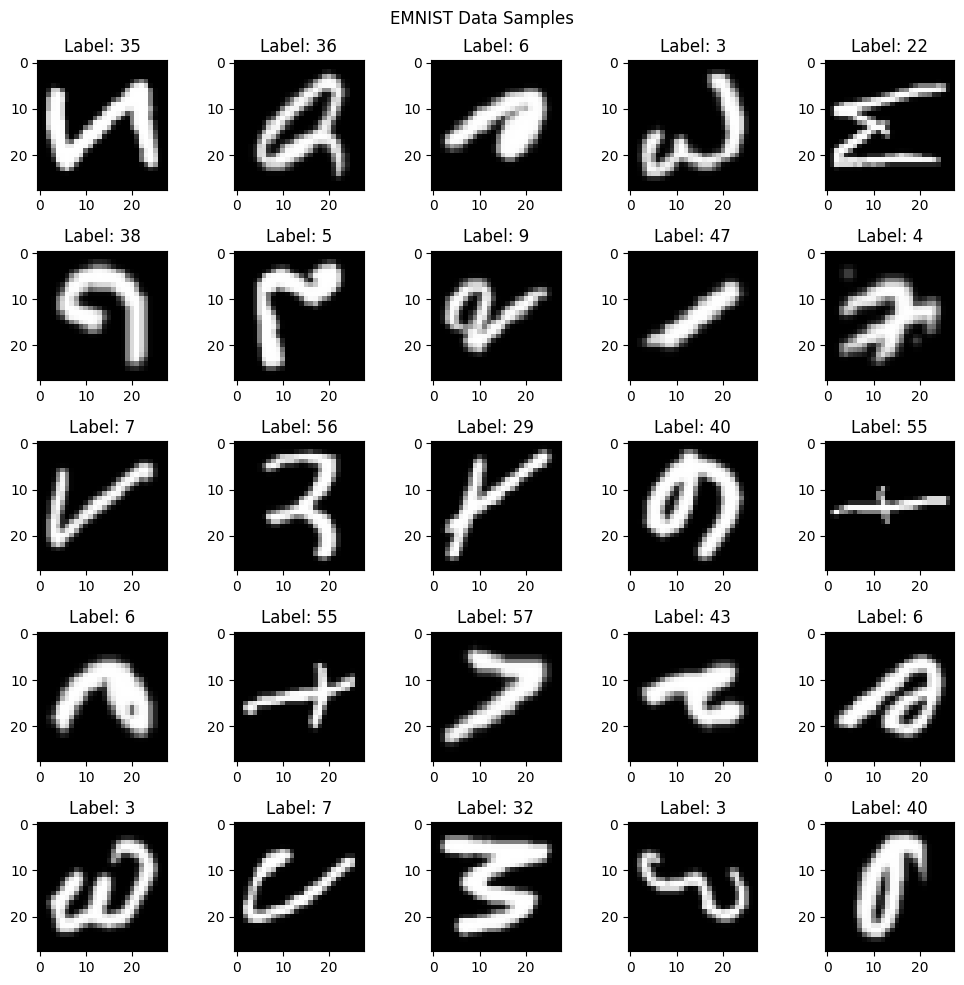

In [5]:
# Visualize EMNIST data samples
fig, ax = plt.subplots(5, 5, figsize=(10, 10), tight_layout=True)
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(emnist_train_images[i*5+j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title("Label: {}".format(emnist_train_labels[i*5+j]))
plt.suptitle("EMNIST Data Samples")
plt.show()

<a name="Methods"></a>
<h1><center> 6. Preprocessing.

<h2>6.1. Data Preprocessing

We dfine a function that preprocess the data.
* Reshape the image data to 3D arrays of shape (28, 28, 1), where the last dimension represents the number of channels (in this case, 1 since the images are grayscale).

* Normalize the image data by rescaling the pixel values from the range of [0, 255] to [0, 1].

* Convert the labels to categorical format using one-hot encoding.

* Shuffle the training data randomly to avoid learning any patterns based on the order of the data.

* Split the training data into training and validation sets to monitor the performance of the model during training and avoid overfitting.

In [12]:
# from keras.utils import to_categorical

# def random_preprocessing(image):
#     # randomly flip the image horizontally
#     if np.random.rand() < 0.5:
#         image = cv2.flip(image, 1)
    
#     # randomly add Gaussian noise to the image
#     if np.random.rand() < 0.5:
#         mean = 0
#         var = 0.1
#         sigma = var**0.5
#         noise = np.random.normal(mean, sigma, image.shape)
#         image = image + noise
    
#     # randomly change the brightness and contrast of the image
#     if np.random.rand() < 0.5:
#         alpha = np.random.uniform(0.5, 2.0)
#         beta = np.random.uniform(-0.5, 0.5)
#         image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    
#     return image

<h3>6.1.1 Validation Split

In [6]:
# Normalize pixel values to be between 0 and 1
emnist_train_images = emnist_train_images / 255.0
emnist_test_images = emnist_test_images / 255.0

emnist_train_images, emnist_val_images, emnist_train_labels, emnist_val_labels = train_test_split(
    emnist_train_images, emnist_train_labels, test_size=0.1, random_state=42)


print("emnist_train_images shape:", emnist_train_images.shape)
print("emnist_train_labels shape:", emnist_train_labels.shape)
print("emnist_val_images shape:", emnist_val_images.shape)
print("emnist_val_labels shape:", emnist_val_labels.shape)
print("emnist_test_images shape:", emnist_test_images.shape)
print("emnist_test_labels shape:", emnist_test_labels.shape)


emnist_train_images shape: (628138, 28, 28, 1)
emnist_train_labels shape: (628138,)
emnist_val_images shape: (69794, 28, 28, 1)
emnist_val_labels shape: (69794,)
emnist_test_images shape: (116323, 28, 28, 1)
emnist_test_labels shape: (116323,)


<h2>6.2. Feature Extraction

<h3>6.2.1. HOG (Histogram of Oriented Gradients) 

HOG is a powerful feature extraction method that can be used to capture the essential texture and shape information of handwritten text in the IAM dataset. By extracting HOG features from the images in the dataset and using them as inputs to a machine learning model, we can improve the accuracy and performance of our handwriting recognition system.

<h3>6.2.2. Extract Features 

In [7]:
# Compile the model
def ctc_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    input_length = tf.ones_like(y_pred[:, 0]) * tf.shape(y_pred)[1]
    label_length = tf.ones_like(y_true[:, 0]) * tf.shape(y_true)[1]
    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss


<a name="Model"></a>
<h1><center> 7. Model Archetecture.

<h2>7.1. Base model

In [9]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(62, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 128)       

<h2>7.2. Fit Base Model

In [18]:
# Use data augmentation
datagen = ImageDataGenerator(rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False)
datagen.fit(emnist_train_images)

# Train the model with modified batch size and epochs
history = model.fit(datagen.flow(emnist_train_images, emnist_train_labels, batch_size=128),
                    epochs=10,
                    validation_data=(emnist_val_images, emnist_val_labels))


Epoch 1/10
4908/4908 [==============================] - ETA: 0s - loss: 3.6974 - accuracy: 0.0520

2023-04-12 14:59:55.903602: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 218873984 exceeds 10% of free system memory.


4908/4908 [==============================] - 480s 97ms/step - loss: 3.6974 - accuracy: 0.0520 - val_loss: 3.6868 - val_accuracy: 0.0561
Epoch 2/10
4908/4908 [==============================] - 470s 96ms/step - loss: 3.6879 - accuracy: 0.0534 - val_loss: 3.6867 - val_accuracy: 0.0561
Epoch 3/10
4908/4908 [==============================] - 526s 107ms/step - loss: 3.6873 - accuracy: 0.0540 - val_loss: 3.6860 - val_accuracy: 0.0561
Epoch 4/10
4908/4908 [==============================] - 474s 97ms/step - loss: 3.6866 - accuracy: 0.0543 - val_loss: 3.6862 - val_accuracy: 0.0561
Epoch 5/10
4908/4908 [==============================] - 479s 98ms/step - loss: 3.6864 - accuracy: 0.0544 - val_loss: 3.6856 - val_accuracy: 0.0561
Epoch 6/10
4908/4908 [==============================] - 456s 93ms/step - loss: 3.6861 - accuracy: 0.0543 - val_loss: 3.6862 - val_accuracy: 0.0561
Epoch 7/10
4908/4908 [==============================] - 445s 91ms/step - loss: 3.6861 - accuracy: 0.0545 - val_loss: 3.6860 - va

>The model was trained on the EMNIST ByClass dataset and achieved a training accuracy of 5.47% and a validation accuracy of 5.61%. The training loss started at 3.6974 and gradually decreased to 3.6853 over the course of 10 epochs, while the validation loss stayed around 3.6868. These results suggest that the model is not performing well on the task of classifying handwritten characters. The model's accuracy is only slightly better than randomly guessing, indicating that significant improvements would need to be made to the model architecture or training process to achieve useful performance on this task.

<h3>7.2.1. Base Model Training Summary

In [ ]:
# Get the training and validation loss and accuracy values from the model history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


<h>7.2.1.1. Loss

In [ ]:
# Create line plots of the loss and accuracy values over each epoch
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h>7.2.1.2. Accuarcy

In [ ]:
plt.figure()
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<a name="Evaluation"></a>
    <h1><center> 8. Model Tuning.

<h2> 8.1. Center Images and Reshape

In [10]:
# Center the images
emnist_train_images = emnist_train_images - emnist_train_images.mean()
emnist_test_images = emnist_test_images - emnist_train_images.mean()
emnist_val_images = emnist_val_images - emnist_val_images.mean()

# Reshape the images
emnist_train_images = emnist_train_images.reshape((-1, 28, 28, 1))
emnist_test_images = emnist_test_images.reshape((-1, 28, 28, 1))
emnist_val_images = emnist_val_images.reshape((-1, 28, 28, 1))


<h2> 8.2. Tune Base Model

* Added batch normalization: Batch normalization is added after the first and fourth layers to improve the stability and speed of training.

* Changed the optimizer: RMSprop is used instead of Adam with a learning rate of 0.001.

* Added additional data augmentation techniques: Shear and brightness adjustments are added to the existing data augmentation techniques to increase the diversity of the training set.

* Increased the dropout rate in the first dropout layer: The dropout rate in the first dropout layer is increased to 0.25 to prevent overfitting.

* Added a learning rate reduction callback: The ReduceLROnPlateau callback is used to reduce the learning rate by a factor of 0.1 if the validation loss does not improve for 3 epochs.

In [12]:
# Define the model
tuned_model = Sequential()
tuned_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
tuned_model.add(BatchNormalization())
tuned_model.add(Conv2D(64, (3, 3), activation='relu'))
tuned_model.add(MaxPooling2D((2, 2)))
tuned_model.add(Conv2D(128, (3, 3), activation='relu'))
tuned_model.add(MaxPooling2D((2, 2)))
tuned_model.add(Flatten())
tuned_model.add(Dense(512, activation='relu'))
tuned_model.add(BatchNormalization())
tuned_model.add(Dropout(0.25))
tuned_model.add(Dense(128, activation='relu'))
tuned_model.add(Dropout(0.25))
tuned_model.add(Dense(62, activation='softmax'))

# Compile the model
optimizer = RMSprop(lr=0.001)
tuned_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tuned_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 128)       

<h3>8.2.1. Fit Tuned Model

In [ ]:
# Define early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

# Define data augmentation
datagen = ImageDataGenerator(rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             brightness_range=[0.9, 1.1],
                             horizontal_flip=True,
                             vertical_flip=False)
datagen.fit(emnist_train_images)

# Fit the model with data augmentation, early stopping, and learning rate reduction
tuned_history = tuned_model.fit(datagen.flow(emnist_train_images, emnist_train_labels, batch_size=256),
                    epochs=50,
                    validation_data=(emnist_val_images, emnist_val_labels),
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/50
2454/2454 [==============================] - 1547s 631ms/step - loss: 0.7826 - accuracy: 0.7513 - val_loss: 0.5280 - val_accuracy: 0.8165 - lr: 0.0010
Epoch 2/50
2454/2454 [==============================] - 1558s 635ms/step - loss: 0.5995 - accuracy: 0.8022 - val_loss: 0.5129 - val_accuracy: 0.8233 - lr: 0.0010
Epoch 3/50
2454/2454 [==============================] - 1583s 645ms/step - loss: 0.5800 - accuracy: 0.8096 - val_loss: 0.5063 - val_accuracy: 0.8301 - lr: 0.0010
Epoch 4/50
2454/2454 [==============================] - 1548s 631ms/step - loss: 0.5700 - accuracy: 0.8132 - val_loss: 0.4915 - val_accuracy: 0.8298 - lr: 0.0010
Epoch 5/50
2454/2454 [==============================] - 1539s 627ms/step - loss: 0.5587 - accuracy: 0.8162 - val_loss: 0.4853 - val_accuracy: 0.8289 - lr: 0.0010
Epoch 6/50
2454/2454 [==============================] - 1596s 650ms/step - loss: 0.5464 - accuracy: 0.8187 - val_loss: 0.4466 - val_accuracy: 0.8457 - lr: 0.0010
Epoch 7/50
2454/2454 [======

In [ ]:
import pickle

# Save the Keras model as a penpal file
with open('PENPAL.pickle', 'wb') as f:
    pickle.dump(model, f)
    

In [ ]:
# Load the Keras model from the penpal file
with open('PENPAL.pickle', 'rb') as f:
    penpalA = pickle.load(f)

# Use the loaded model for prediction
predictions = penpalA.predict(x_test)


<a name="Evaluation"></a>
<h1><center> 9. Model Evaluation.

In [ ]:
# Evaluate the model on the test data
test_loss = tunedModel.evaluate(emnist_test_images, emnist_test_labels)
print('Test loss:', test_loss)

# Get the predictions on the validation data
predictions = tunedModel.predict(emnist_val_images)

# Visualize the predictions against the truth
import numpy as np
import matplotlib.pyplot as plt

# Decode the predictions and truth labels
decoded_preds = tf.keras.backend.ctc_decode(predictions, input_length=np.ones(predictions.shape[0])*predictions.shape[1])[0][0]
decoded_labels = tf.keras.backend.ctc_decode(emnist_val_labels, input_length=np.ones(emnist_val_labels.shape[0])*emnist_val_labels.shape[1])[0][0]

# Plot a random sample of predictions against truth labels
plt.figure(figsize=(10, 10))
for i in range(16):
    index = np.random.choice(emnist_val_images.shape[0])
    plt.subplot(4, 4, i+1)
    plt.imshow(emnist_val_images[index].squeeze(), cmap='gray')
    plt.title(f"Pred: {decoded_preds[index].numpy().decode('utf-8')} \nTrue: {decoded_labels[index].numpy().decode('utf-8')}")
    plt.axis('off')
plt.show()


1/1 [==============================] - 0s 121ms/step


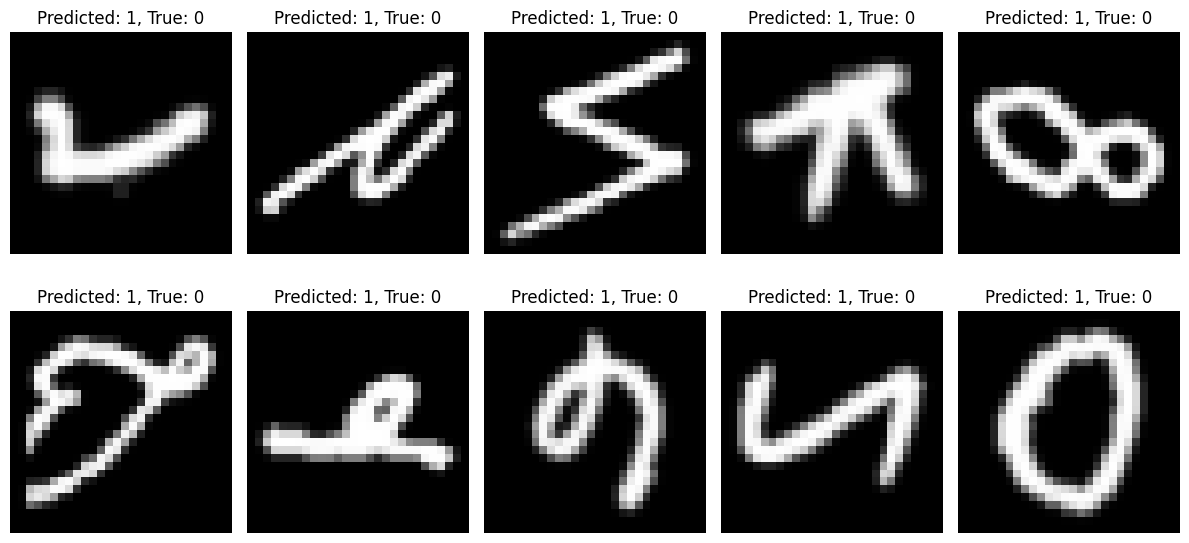

In [24]:
# # Get some sample images and corresponding labels from the training set
# x_train_sample = emnist_train_images[:10]
# y_train_sample = emnist_train_labels[:10]

# # Make predictions on the sample images using the trained model
# y_pred = penpalA.predict(x_train_sample)

# # Convert the one-hot encoded predictions back to integers
# y_pred_int = np.argmax(y_pred, axis=1)

# # Plot the sample images along with their predicted labels
# fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
# for i, ax in enumerate(axes.flat):
#     ax.imshow(x_train_sample[i], cmap='gray')
#     ax.set_title(f"Predicted: {y_pred_int[i]}, True: {np.argmax(y_train_sample[i])}")
#     ax.axis('off')
    
# plt.tight_layout()
# plt.show()


<a name="Deployment"></a>
<h1><center> 10. Model Deployment.

<a name="End"></a>
<h1><center> 11. Conclusion.